# Introducción y objetivo

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Carga datos de dataset \\

Contiene aproximadamente 10 años de observaciones diarias de variables climáticas: temperatura, dirección y velocidad del viento, humedad, presión, nubosidad, y cantidad de lluvia en mm.
Tras observar los datos de un día dado, el objetivo es predecir las variables target:

-RainFallTomorrow: cantidad de lluvia del día posterior a la observación. Problema de Regresión.

-RainTomorrow: si el día siguiente llueve o no llueve. Problema de Clasificación.

In [3]:
file_path= 'weatherAUS.csv'
df = pd.read_csv(file_path, sep=',',engine='python')

Sólo queremos predecir la lluvia de las siguientes localidades, y las consideramos como si fueran una única localidad. Por lo tanto, eliminamos la columna localidad.

In [4]:
df = df[(df["Location"] == "Sydney") | (df["Location"] == "SydneyAirport") | (df["Location"] == "Canberra") \
  | (df["Location"] == "Melbourne") | (df["Location"] == "MelbourneAirport")]

df = df.drop(columns=["Location"])

# Análisis exploratorio y selección de características

## Visualización de los datos

Hechemos un vistazo a los datos que contiene nuestro dataframe.

In [5]:
df.head()

,Unnamed: 0,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
30167,30176,2008-02-01,19.5,22.4,15.6,6.2,0.0,NaN,NaN,S,...,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes,6.0
30168,30177,2008-02-02,19.5,25.6,6.0,3.4,2.7,NaN,NaN,W,...,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes,6.6
30169,30178,2008-02-03,21.6,24.5,6.6,2.4,0.1,NaN,NaN,ESE,...,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes,18.8
30170,30179,2008-02-04,20.2,22.8,18.8,2.2,0.0,NaN,NaN,NNE,...,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes,77.4
30171,30180,2008-02-05,19.7,25.7,77.4,NaN,0.0,NaN,NaN,NNE,...,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes,1.6


Identificamos los tipos de datos de cada columna, y la cantidad de datos faltantes en cada columna, comparándolo con el tamaño del dataframe.

In [6]:
df.info()
print("\nTamaño del dataframe:")
df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15986 entries, 30167 to 70370
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        15986 non-null  int64  
 1   Date              15986 non-null  object 
 2   MinTemp           15495 non-null  float64
 3   MaxTemp           15500 non-null  float64
 4   Rainfall          15199 non-null  float64
 5   Evaporation       14280 non-null  float64
 6   Sunshine          14038 non-null  float64
 7   WindGustDir       14529 non-null  object 
 8   WindGustSpeed     14531 non-null  float64
 9   WindDir9am        15291 non-null  object 
 10  WindDir3pm        15696 non-null  object 
 11  WindSpeed9am      15725 non-null  float64
 12  WindSpeed3pm      15737 non-null  float64
 13  Humidity9am       15416 non-null  float64
 14  Humidity3pm       15461 non-null  float64
 15  Pressure9am       15251 non-null  float64
 16  Pressure3pm       15260 non-null  fl

(15986, 24)

Algunas medidas de resumen de las variables numéricas de datos.

In [7]:
df.describe()

,Unnamed: 0,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainfallTomorrow
count,15986.000000,15495.000000,15500.000000,15199.000000,14280.000000,14038.000000,14531.000000,15725.000000,15737.000000,15416.000000,15461.000000,15251.000000,15260.000000,13309.000000,13054.000000,15481.000000,15490.000000,15199.000000
mean,49512.619855,11.605221,21.751781,2.303744,4.866828,6.854694,44.417315,16.613672,21.797166,68.903023,51.280577,1018.305836,1016.064239,4.750545,4.746131,15.545953,20.229154,2.302586
std,15172.399796,5.851347,6.053679,7.385992,3.069869,3.842419,14.958027,10.336386,9.518033,15.614788,17.721335,7.400730,7.265386,2.728329,2.589879,5.559295,5.857956,7.385251
min,30176.000000,-8.000000,4.100000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,11.000000,3.000000,986.700000,985.500000,0.000000,0.000000,-1.300000,3.700000,0.000000
25%,34173.250000,7.900000,17.100000,0.000000,2.600000,3.700000,33.000000,9.000000,15.000000,59.000000,39.000000,1013.400000,1011.200000,2.000000,2.000000,11.600000,15.900000,0.000000
50%,47228.500000,11.600000,21.300000,0.000000,4.200000,7.500000,43.000000,15.000000,20.000000,70.000000,51.000000,1018.500000,1016.300000,6.000000,6.000000,15.400000,19.800000,0.000000
75%,66393.750000,15.800000,25.800000,0.800000,6.600000,10.000000,54.000000,22.000000,28.000000,80.000000,62.000000,1023.300000,1021.000000,7.000000,7.000000,19.500000,24.100000,0.800000
max,70391.000000,30.500000,46.800000,119.400000,23.800000,13.900000,122.000000,69.000000,76.000000,100.000000,100.000000,1040.600000,1037.900000,9.000000,8.000000,37.200000,46.100000,119.400000


## Gráficos univariados

Graficamos las diferentes variables del dataframe, para dar un primer pantallazo de nuestro datos, y a su vez, chequeamos el balanceo de las variables.

### Lluvia

Buscamos predecir si lloverá un día con los datos de días anteriores. Para esto, es vital que conozcamos cómo se ven estos datos:

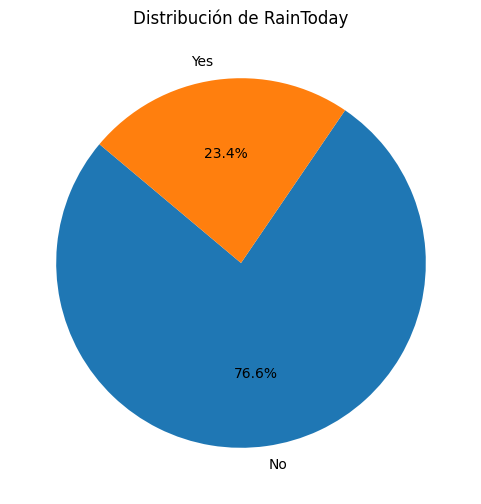

In [8]:
rain_counts = df['RainToday'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(rain_counts, labels=rain_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de RainToday')
plt.show()

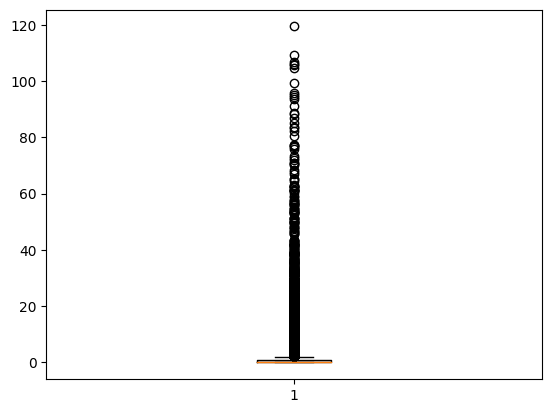

In [9]:
plt.boxplot(df.dropna(subset=['Rainfall'])['Rainfall'])
plt.show()

En el caso de RainTomorrow, cuenta cuánto llovió en un día dado. Como la mayoría de días no llueve, este valor es cercano a 0 en todos estos. Por lo tanto, casi todo día lluvioso es considerado un valor extremo.


### Velocidad del Viento

Procedemos a graficar otras variables, para conocer cómo se ve nuestra base de datos.

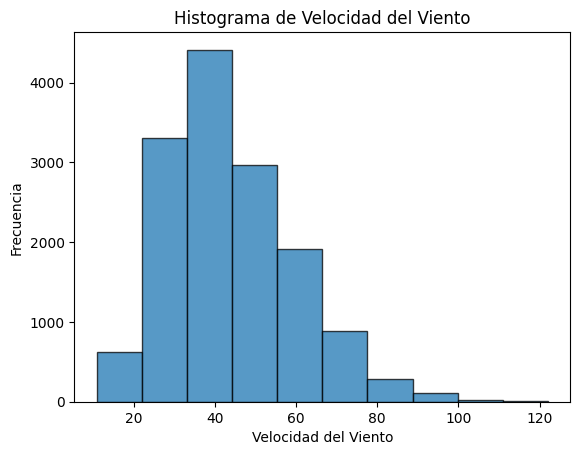

In [10]:
plt.hist(df['WindGustSpeed'], bins=10, edgecolor='k', alpha=0.75)
plt.xlabel('Velocidad del Viento')
plt.ylabel('Frecuencia')
plt.title('Histograma de Velocidad del Viento')
plt.show()

### Nubes

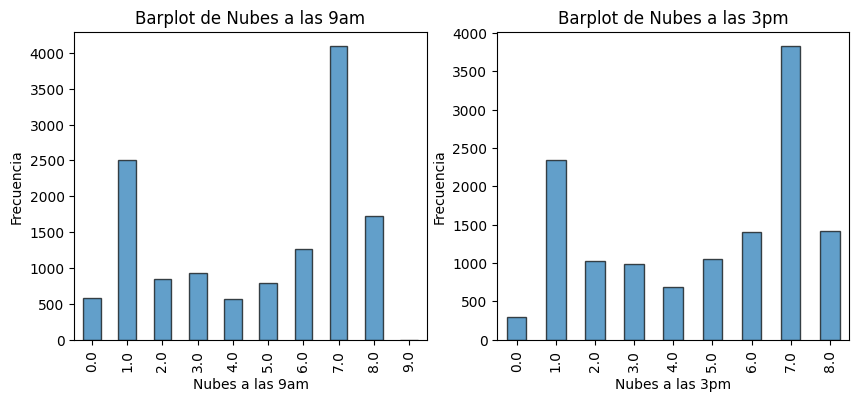

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
df['Cloud9am'].value_counts().sort_index().plot(kind="bar", ax=axes[0], edgecolor='k', alpha=0.7)
axes[0].set_xlabel('Nubes a las 9am')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Barplot de Nubes a las 9am')

df['Cloud3pm'].value_counts().sort_index().plot(kind="bar", ax=axes[1], edgecolor='k', alpha=0.7)
axes[1].set_xlabel('Nubes a las 3pm')
axes[1].set_ylabel('Frecuencia')
axes[1].set_title('Barplot de Nubes a las 3pm')

plt.show()


### Presión

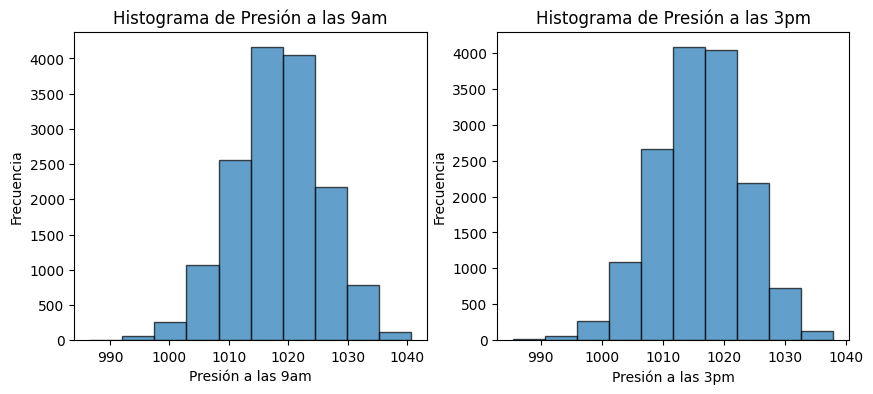

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
df['Pressure9am'].plot.hist(ax=axes[0], bins=10, edgecolor='k', alpha=0.7)
axes[0].set_xlabel('Presión a las 9am')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Histograma de Presión a las 9am')

df['Pressure3pm'].plot.hist(ax=axes[1], bins=10, edgecolor='k', alpha=0.7)
axes[1].set_xlabel('Presión a las 3pm')
axes[1].set_ylabel('Frecuencia')
axes[1].set_title('Histograma de Presión a las 3pm')

plt.show()

### Temperatura mínima y máxima

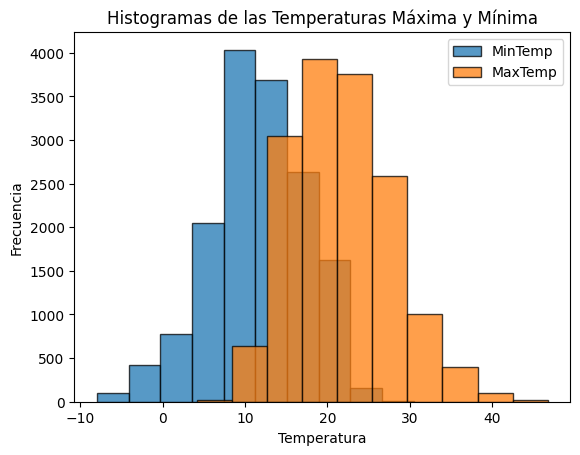

In [13]:
plt.hist(df['MinTemp'], bins=10, edgecolor='k', alpha=0.75, label='MinTemp')
plt.hist(df['MaxTemp'], bins=10, edgecolor='k', alpha=0.75, label='MaxTemp')
plt.xlabel('Temperatura')
plt.ylabel('Frecuencia')
plt.title('Histogramas de las Temperaturas Máxima y Mínima')
plt.legend()
plt.show()

## Gráficos bivariados

Veamos cómo afecta la presencia de nubes a la probabilidad de lluvia al día siguiente.

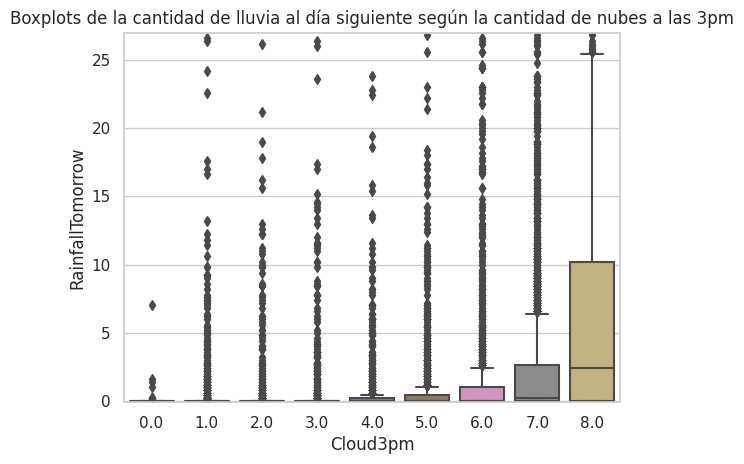

In [14]:
sns.set(style="whitegrid")

plt.ylim(-0.1, 27)

sns.boxplot(x='Cloud3pm', y='RainfallTomorrow', data=df)
plt.title('Boxplots de la cantidad de lluvia al día siguiente según la cantidad de nubes a las 3pm')
plt.show()

Estos resultados nos dan un primer indicio acerca de la correlación que existirá entre la cantidad de nubes en un día dado con la probabilidad de lluvia, lo cual puede ser de utilidad para el uso futuro.

## Limpieza de los datos

Cantidad de valores faltantes.

In [15]:
df.isna().sum()

Unnamed: 0             0
Date                   0
MinTemp              491
MaxTemp              486
Rainfall             787
Evaporation         1706
Sunshine            1948
WindGustDir         1457
WindGustSpeed       1455
WindDir9am           695
WindDir3pm           290
WindSpeed9am         261
WindSpeed3pm         249
Humidity9am          570
Humidity3pm          525
Pressure9am          735
Pressure3pm          726
Cloud9am            2677
Cloud3pm            2932
Temp9am              505
Temp3pm              496
RainToday            787
RainTomorrow         787
RainfallTomorrow     787
dtype: int64

Veamos la matriz de correlación si simplemente eliminamos todos los valores faltantes.


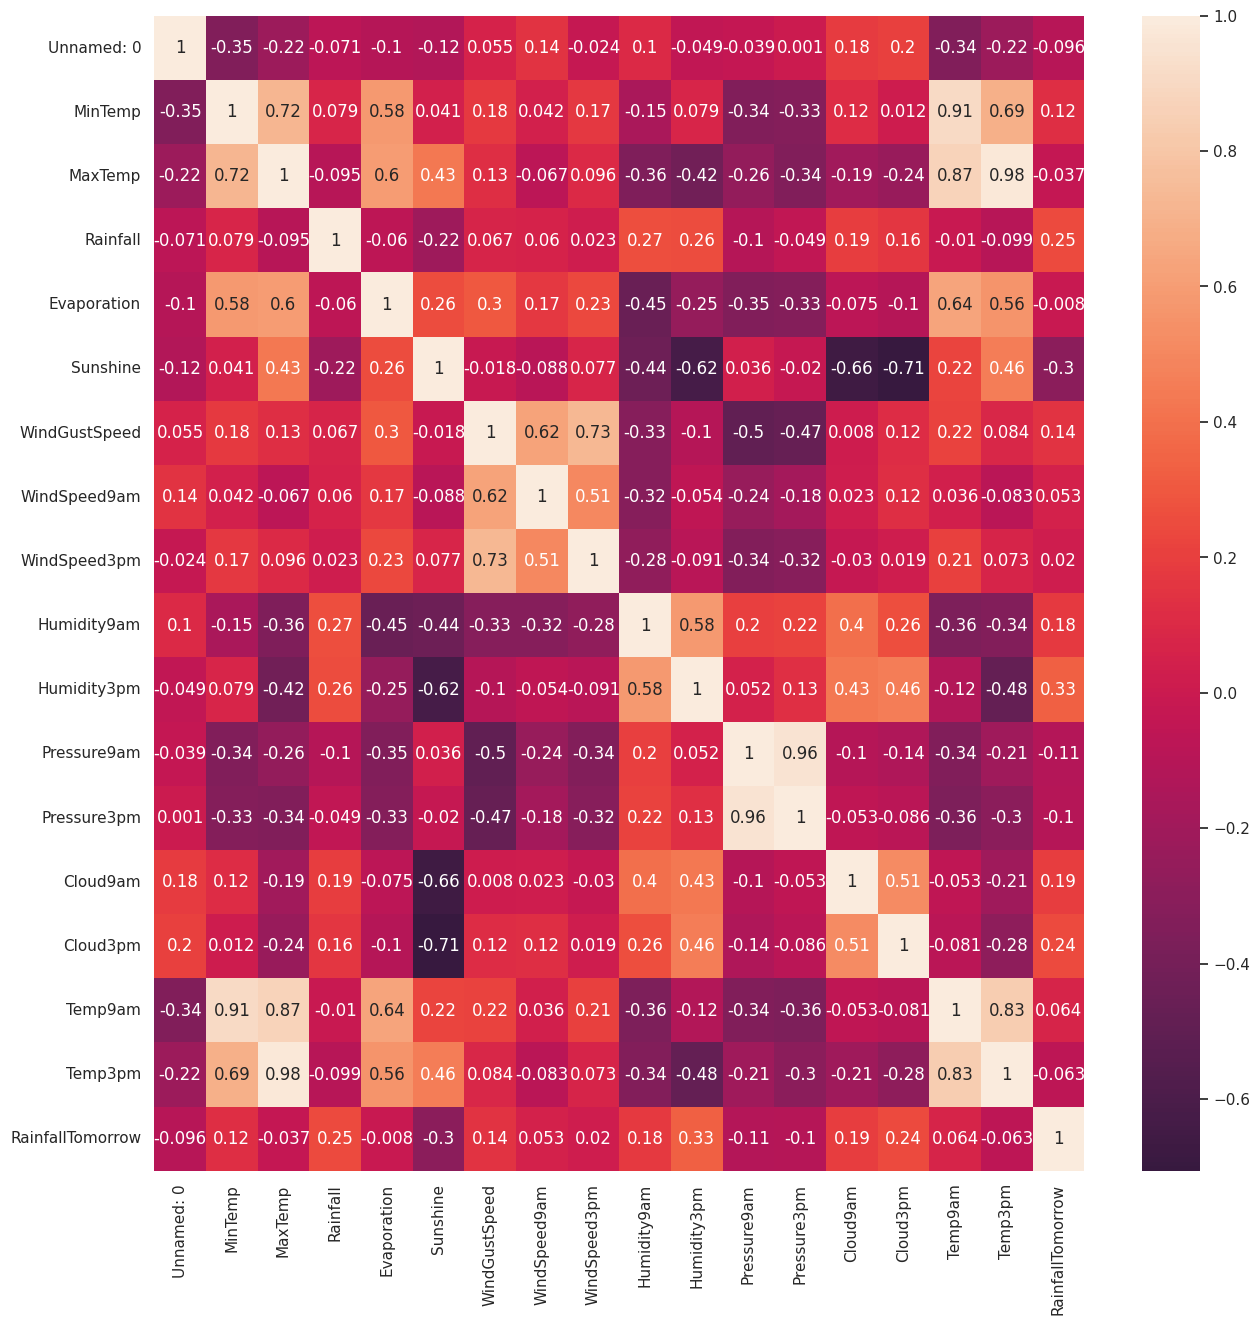

In [16]:
df2 = df.dropna()
corr = df2.select_dtypes(include=['number']).corr(method='pearson').round(3)
plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True, cmap="rocket", center=0)
plt.show()

Observando la matriz de correlación podemos notar que existen ciertas variables que están altamente relacionadas.

Por ejemplo, MaxTemp y Temp3pm, y MinTemp y Temp9am. Entonces, podemos simplificar los datos eliminando las columnas Temp 3pm y Temp9am.

Por otro lado, la Pressure9am y Pressure3pm también tienen una alta correlación, y por lo tanto, haciendo otra observación de la matriz de correlación, notamos que Pressure9am tiene una correlación levemente mayor que Pressure3pm con RainfallTomorrow, y entonces, consideraremos Pressure3pm como un dato redundante.

De la misma forma, llegamos a la conclusión de eliminar WindSpeed3pm.

In [17]:
df = df.drop(columns=["Pressure3pm", "Temp3pm", "Temp9am", "WindSpeed3pm"])

Consideramos la entrada de RainToday, RainTomorrow y RainfallTomorrow como datos esenciales para el modelo. Por lo tanto, considerando también la baja proporción de datos faltantes para estas columnas, decidimos eliminar cualquier entrada que no contenga estos datos.

In [18]:
df = df.dropna(subset=['RainToday', 'RainTomorrow', 'RainfallTomorrow'])

Por otro lado, existe una columna de nombre "Unnamed: 0", que además de no tener un significado claro, no parece tener mucha correlación con las variables que queremos predecir.

In [19]:
df = df.drop(columns=["Unnamed: 0"])

Luego de analizar las relaciones de las variables, verificando cuál es el nivel de correlación de múltiples variables con RainfallTomorrow, e intentamos buscar relaciones adicionales. De esta indagación en el dataset, pudimos encontrar que la variación en un día entre la humedad a las 9 am y 3pm es un buen predictor para la cantidad de lluvia en el día próximo.

In [20]:
df["HumidityChange"] = (df["Humidity3pm"] - df["Humidity9am"])

## Codificacion de variables y Balance de datos

#### Codificamos RainToday y RainTomorrow

In [21]:
code_lluvia = {"Yes":1, "No":0}

df['RainToday'] = df["RainToday"].replace(code_lluvia)
df['RainTomorrow'] = df["RainTomorrow"].replace(code_lluvia)

Veamos si existe algún desbalanceo en los datos:

### Balanceo y formatteo de fechas

Balanceo de los años

<Axes: >

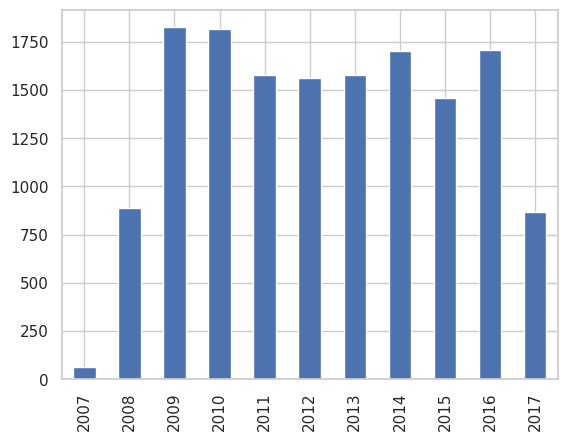

In [22]:
df['Date'] = pd.to_datetime(df['Date'])
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
nbins = len(df["Year"].unique())
df['Year'].value_counts().sort_index().plot(kind="bar")


Text(0.5, 1.0, 'Suma de RainfallTomorrow por Año')

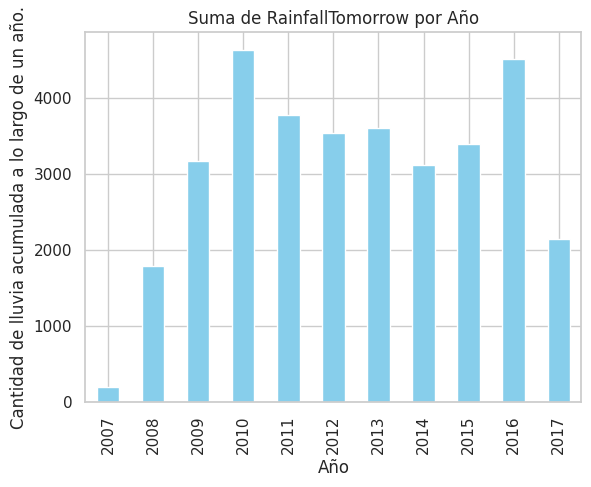

In [23]:
sum_by_year = df.groupby('Year')['RainfallTomorrow'].sum()

sum_by_year.plot(kind='bar', color='skyblue')
plt.xlabel('Año')
plt.ylabel('Cantidad de lluvia acumulada a lo largo de un año.')
plt.title('Suma de RainfallTomorrow por Año')

Se puede observar que la variable Year no tiene una relevancia mayor en la cantidad de lluvia, ya que se puede ver que el barplot es muy similar al anteriomente visto, lo cual nos dice que la cantidad de lluvia en un año depende realmente casi exclusivamente de la cantidad de datos que tengamos del mismo.

Por lo tanto, no consideramos esta variable de relevancia y se la omitirá.

In [24]:
df = df.drop(columns=["Year"])

Balanceo de los meses

<Axes: >

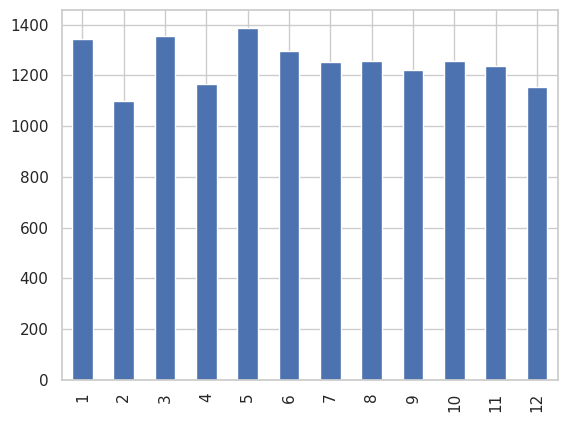

In [25]:
df['Month'].value_counts().sort_index().plot(kind="bar")

Observamos que existe un buen balanceo de los años y los meses.

Ahora, podemos finalmente codificar fecha

In [26]:
code_mesesX = {
    1: np.cos(np.pi/4),
    2: np.cos(np.pi/4),
    3: np.cos(3*np.pi/4),
    4: np.cos(3*np.pi/4),
    5: np.cos(3*np.pi/4),
    6: np.cos(5*np.pi/4),
    7: np.cos(5*np.pi/4),
    8: np.cos(5*np.pi/4),
    9: np.cos(7*np.pi/4),
    10: np.cos(7*np.pi/4),
    11: np.cos(7*np.pi/4),
    12: np.cos(np.pi/4)
}
code_mesesY = {
    1: np.sin(np.pi/4),
    2: np.sin(np.pi/4),
    3: np.sin(3*np.pi/4),
    4: np.sin(3*np.pi/4),
    5: np.sin(3*np.pi/4),
    6: np.sin(5*np.pi/4),
    7: np.sin(5*np.pi/4),
    8: np.sin(5*np.pi/4),
    9: np.sin(7*np.pi/4),
    10: np.sin(7*np.pi/4),
    11: np.sin(7*np.pi/4),
    12: np.sin(np.pi/4)
}
df['SeasonX'] = df["Date"].dt.month.replace(code_mesesX)
df['SeasonY'] = df["Date"].dt.month.replace(code_mesesY)
df = df.drop(columns='Date')

### Balanceo y formatteo de la dirección del viento

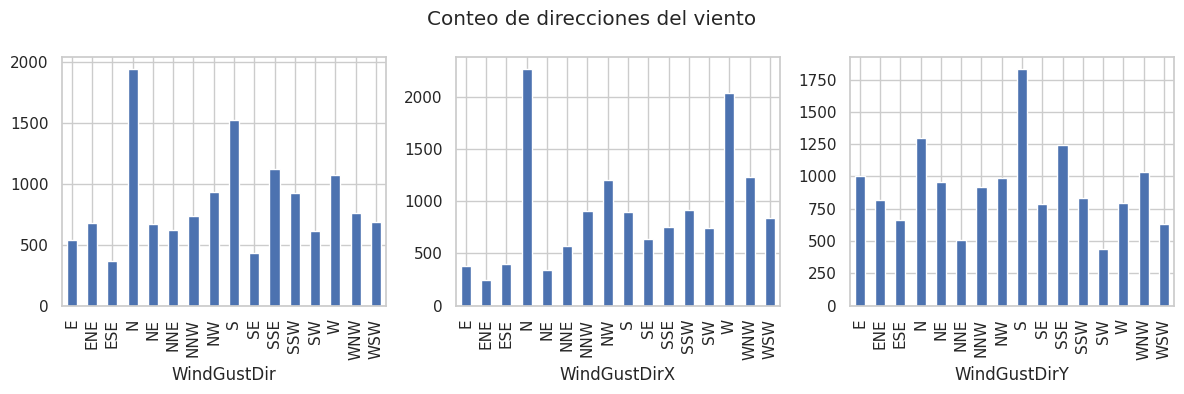

In [27]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))  # 1 fila y 3 columnas para los gráficos

df['WindGustDir'].value_counts().sort_index().plot(kind="bar", ax=axes[0])
df['WindDir9am'].value_counts().sort_index().plot(kind="bar", ax=axes[1])
df['WindDir3pm'].value_counts().sort_index().plot(kind="bar", ax=axes[2])

axes[0].set_xlabel('WindGustDir')
axes[1].set_xlabel('WindGustDirX')
axes[2].set_xlabel('WindGustDirY')
fig.suptitle('Conteo de direcciones del viento')

plt.tight_layout()
plt.show()

#### Codificamos la dirección del viento


Ahora que pudimos observar que la dirección del viento está relativamente balanceada, no podemos asumir que será una variable de poco interés. Entonces, creamos una nueva representacion numérica del viento, y dos columnas para esta nueva representación.

In [28]:
WindDirToXDir = {
    'N': 0,
    'S': 0,
    'E': 1,
    'W': -1,
    'NW': 2**0.5,
    'NE': -2**0.5,
    'SE': 2**0.5,
    'SW': -2**0.5,
    'NNW': np.cos(5*np.pi/8),
    'NNE': np.cos(3*np.pi/8),
    'ENE': np.cos(1*np.pi/8),
    'WNW': np.cos(7*np.pi/8),
    'ESE': np.cos(-1*np.pi/8),
    'SSE': np.cos(-3*np.pi/8),
    'SSW': np.cos(-5*np.pi/8),
    'WSW': np.cos(-7*np.pi/8)
}
WindDirToYDir = {
    'N': 1,
    'S': -1,
    'E': 0,
    'W': 0,
    'NW': 2**0.5,
    'NE': 2**0.5,
    'SE': -2**0.5,
    'SW': -2**0.5,
    'NNW': np.sin(3*np.pi/8),
    'NNE': np.sin(3*np.pi/8),
    'ENE': np.sin(1*np.pi/8),
    'WNW': np.sin(1*np.pi/8),
    'ESE': np.sin(-1*np.pi/8),
    'SSE': np.sin(-3*np.pi/8),
    'SSW': np.sin(-3*np.pi/8),
    'WSW': np.sin(-1*np.pi/8)
}

df['WindDir3pmX'] = df['WindDir3pm'].replace(WindDirToXDir)
df['WindDir3pmY'] = df['WindDir3pm'].replace(WindDirToYDir)

df['WindDir9amX'] = df['WindDir9am'].replace(WindDirToXDir)
df['WindDir9amY'] = df['WindDir9am'].replace(WindDirToYDir)

df['WindGustDirX'] = df['WindGustDir'].replace(WindDirToXDir)

df['WindGustDirY'] = df['WindGustDir'].replace(WindDirToYDir)
### La columna original deja de ser de interés
df = df.drop(columns=['WindDir3pm', 'WindDir9am', 'WindGustDir'])

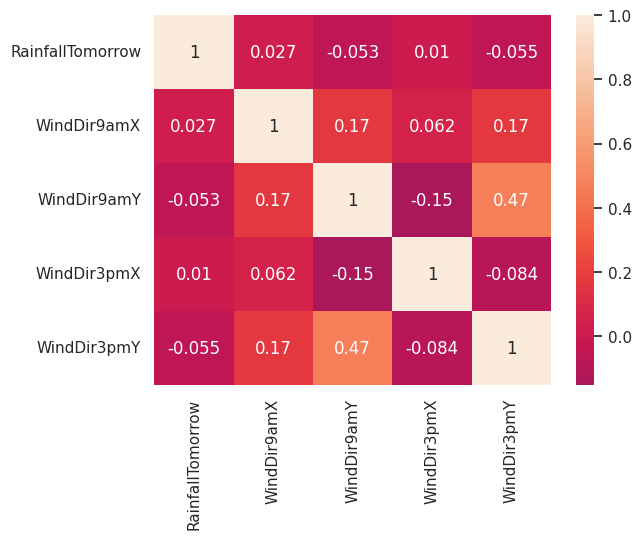

In [29]:
df2 = df[["RainfallTomorrow", "WindDir9amX", "WindDir9amY", "WindDir3pmX", "WindDir3pmY"]].copy()
corr = df2.corr(method='pearson').round(3)
sns.heatmap(corr, annot=True, cmap="rocket", center=0)
plt.show()

Luego, vemos que la dirección del viento a las 9am y las 3pm no necesariamente son buenas para predecir a la otra, por lo que ambas pueden llegar a ser de utilidad, y no eliminamos ninguna.

## Rellenado de datos faltantes

#### Prevención de data-leakage

Antes de realizar el rellenado de datos faltantes, crearemos una nueva variable para poder analizar los efectos de la contaminación train-test de nuestros modelos en el futuro.

Hasta ahora, cuando necesitabamos realizar gráficos o analizar variables, ignorábamos o eliminábamos los números. Sin embargo, necesitamos que no existan valores nulos para poder crear los modelos.
Por lo tanto, ahora que podemos tenemos únicamente variables cuantitativas en nuestro datagrame, reemplazamos los valores nulos por el promedio.

In [30]:
for columna in df.drop(columns=['RainfallTomorrow']).select_dtypes(include=['number']).columns:
  promedio_col = df[columna].mean()
  df[columna].fillna(promedio_col, inplace=True)

#Comprobamos los resultados
df.isna().sum()

MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustSpeed       0
WindSpeed9am        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Cloud9am            0
Cloud3pm            0
RainToday           0
RainTomorrow        0
RainfallTomorrow    0
HumidityChange      0
Month               0
SeasonX             0
SeasonY             0
WindDir3pmX         0
WindDir3pmY         0
WindDir9amX         0
WindDir9amY         0
WindGustDirX        0
WindGustDirY        0
dtype: int64

Vemos que las relaciones no fueron afectadas de manera significativa por la limpieza, por lo que nos damos por satisfechos

# Linear Regression

Importamos los paquetes necesarios.

In [31]:
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, ElasticNetCV, LassoCV
from sklearn.metrics import mean_absolute_error

Definimos las variables de predicción.

In [32]:
variables_prediccion = list(df.drop(columns=["RainfallTomorrow", "RainTomorrow"]).columns)

X = df[variables_prediccion]
y = df['RainfallTomorrow']

## Modelo Base

Como modelo base, crearemos un modelo simple que utilice sólo la lluvia del día actual para predecir la lluvia del próximo día.

In [33]:
model = make_pipeline(StandardScaler(), LinearRegression())

X_soloRainfall = df["Rainfall"].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X_soloRainfall,y.values.reshape(-1,1),test_size=0.2, random_state = 5)

model.fit(X_train, y_train)

# Predecimos sobre el conjunto de test
y_pred = model.predict(X_test)
y_pred.shape, y_test.shape

# Error de test del modelo.
rmse_ols_LinearReg = mean_squared_error(y_test, y_pred, squared = False)
print(f"El error rmse de test es: {rmse_ols_LinearReg.round(4)}")

R2_LinearReg = metrics.r2_score(y_test, y_pred)
print("El R2 es: ", R2_LinearReg.round(4))

mae_LinearReg = mean_absolute_error(y_test, y_pred)
print("El error mae de test es: ", mae_LinearReg.round(4))

El error rmse de test es: 6.7693
El R2 es:  0.1379
El error mae de test es:  3.1905


Como podemos observar, el modelo base no nos proporciona resultados muy prometedores, por lo que no será un gran desafío superarlo.



## Linear Regression

Dado todo este procesamiento, consideramos que el resto de variables son lo suficientemente relevantes para poder predecir la variable RainfallTomorrow por medio de una regresión lineal

El error rmse de test es: 6.2798
El R2 es:  0.2581
El error mae de test es:  3.1605


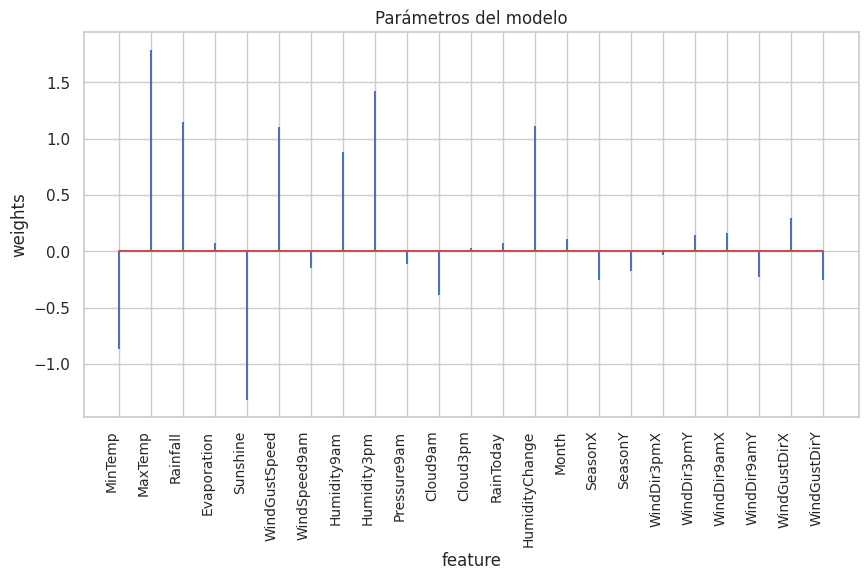

In [34]:
model = make_pipeline(StandardScaler(), LinearRegression())

X_train, X_test, y_train, y_test = train_test_split(X,y.values.reshape(-1,1),test_size=0.2, random_state = 5)


model.fit(X_train, y_train)

# Graficamos los coeficientes del modelo
df_coeficientes = pd.DataFrame({'predictor': X_train.columns, 'coef': model.steps[1][1].coef_.flatten()})

fig, ax = plt.subplots(figsize=(10, 5))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('feature')
ax.set_ylabel('weights')
ax.set_title('Parámetros del modelo')

# Predecimos sobre el conjunto de test
y_pred = model.predict(X_test)
y_pred.shape, y_test.shape

# Error de test del modelo.
rmse_ols_LinearReg = mean_squared_error(y_test, y_pred, squared = False)
print(f"El error rmse de test es: {rmse_ols_LinearReg.round(4)}")

R2_LinearReg = metrics.r2_score(y_test, y_pred)
print("El R2 es: ", R2_LinearReg.round(4))

mae_LinearReg = mean_absolute_error(y_test, y_pred)
print("El error mae de test es: ", mae_LinearReg.round(4))

## Ridge

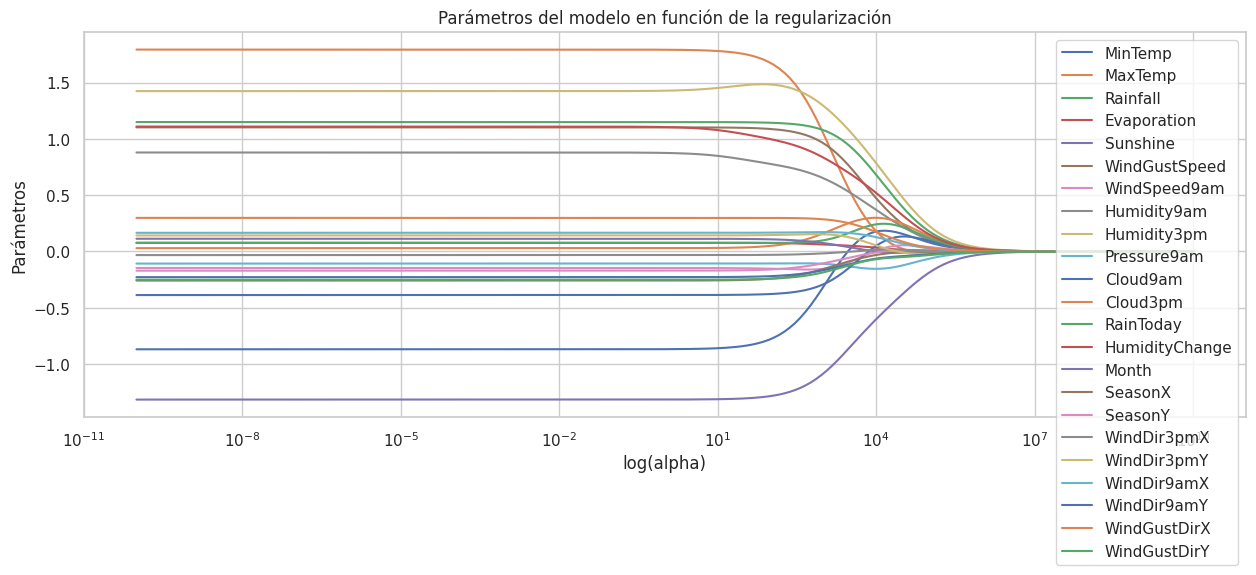

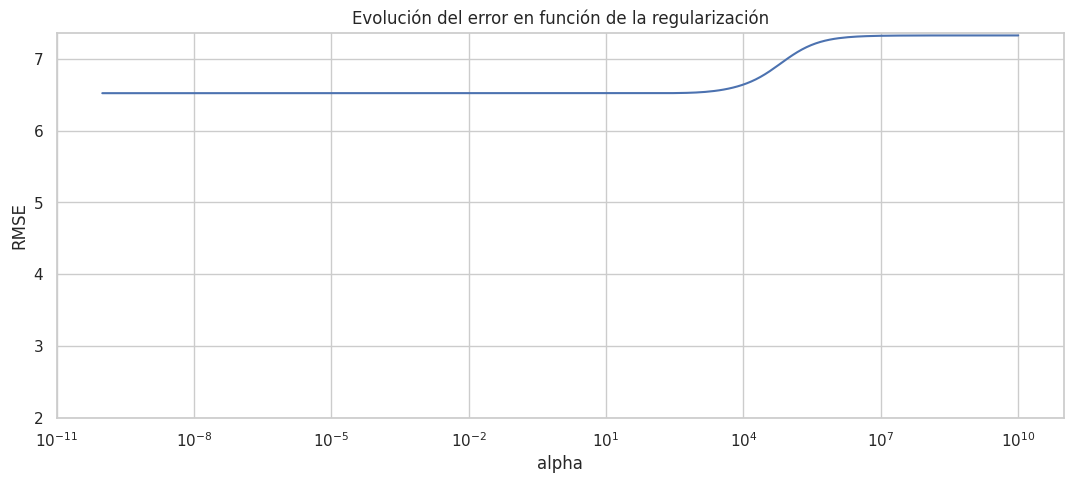

El error rmse de test es: 6.2803
El R2 es:  0.258
El error mae de test es:  3.1542


In [35]:
# Ridge, con datos estandarizados y cross validation
modeloRidge = make_pipeline(StandardScaler(),
                        RidgeCV(
                           alphas          = np.logspace(-10, 10, 200),
                           fit_intercept   = True,
                           store_cv_values = True
                        )
         )

modeloRidge.fit(X_train, y_train)
# Estudiamos la evolución del modelo en función de alpha

alphas = modeloRidge.steps[1][1].alphas
coefs = []

for alpha in alphas:
    # Reentrenamos el modelo con un alpha dado, y determinamos el peso que se
    # le otorga a cada característica
    modelo_aux = make_pipeline(StandardScaler(), Ridge(alpha=alpha))
    modelo_aux.fit(X_train, y_train)
    coefs.append(modelo_aux.steps[1][1].coef_.flatten())

# Graficamos el error de test para cada alpha
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(alphas, coefs, label=X_train.columns)
ax.set_xscale('log')
ax.set_xlabel('log(alpha)')
ax.set_ylabel('Parámetros')
ax.set_title('Parámetros del modelo en función de la regularización');
plt.axis('tight')
plt.legend()
plt.show()


# Evolución del error de validación cruzada en función de alpha
# modelo.cv_values almacena el MSE de CV para cada valor de alpha.
modRidge = modeloRidge.steps[1][1]

mse_cv = modRidge.cv_values_.reshape((-1, 200)).mean(axis=0)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)

# Nos quedamos con el alpha que minimice el rmse
min_rmse     = np.min(rmse_cv)
optimo       = modRidge.alphas[np.argmin(rmse_cv)]


# Graficamos la evolución del error según el alpha
fig, ax = plt.subplots(figsize=(13,5))
ax.plot(modRidge.alphas, rmse_cv)
ax.set_xscale('log')
ax.set_ylim([2,None])
ax.set_title('Evolución del error en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.show()


y_pred = modeloRidge.predict(X_test)

# Error de test del modelo
rmse_ridge = mean_squared_error(y_test,
                y_pred,
                squared = False
             )

rmse_ols_Ridge = mean_squared_error(y_test, y_pred, squared = False)
print(f"El error rmse de test es: {rmse_ols_Ridge.round(4)}")

R2_Ridge = metrics.r2_score(y_test, y_pred)
print("El R2 es: ", R2_Ridge.round(4))

mae_Ridge = mean_absolute_error(y_test, y_pred)
print("El error mae de test es: ", mae_Ridge.round(4))

## Lasso

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


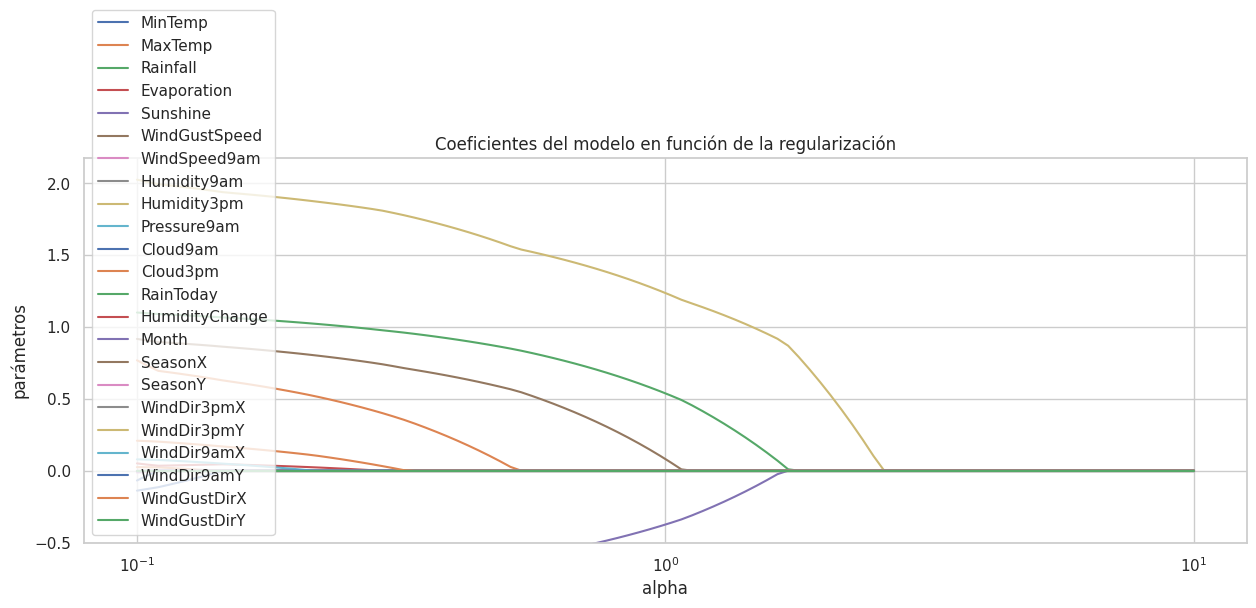

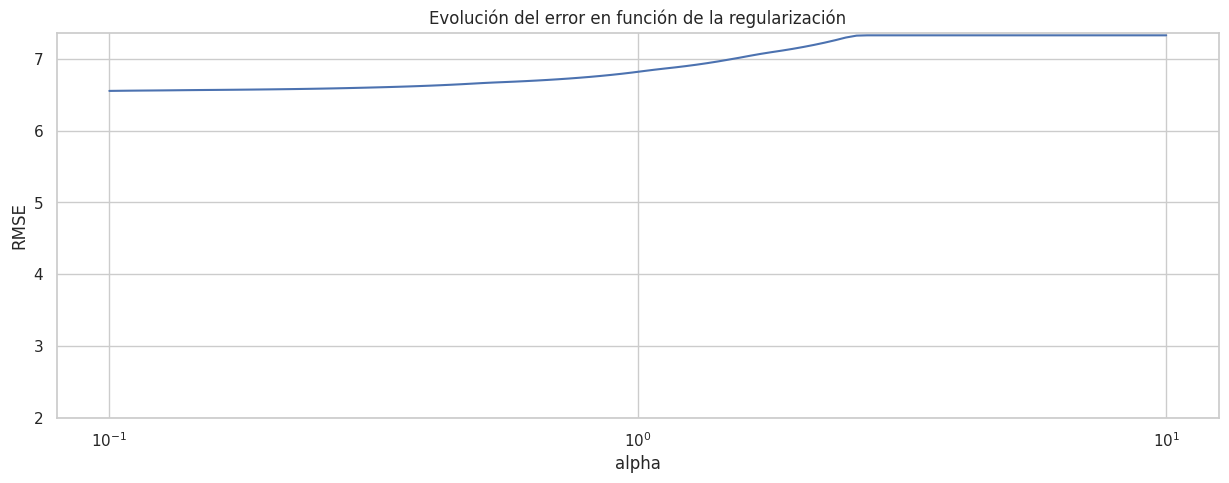

El error rmse de test es: 6.3218
El R2 es:  0.2481
El error mae de test es:  3.0982


In [36]:
# Lasso con cross validation
modeloLasso = make_pipeline(StandardScaler(),
                        LassoCV(
                           alphas=np.logspace(-1, 1, 100),
                           cv=10
                        )
         )

modeloLasso.fit(X_train, y_train)

# Evolución de los parámetros en función de alpha
modLasso = modeloLasso.steps[1][1]

alphas = modLasso.alphas_
coefs = []

for alpha in alphas:
    modelo_aux = make_pipeline(StandardScaler(), Lasso(alpha=alpha))
    modelo_aux.fit(X_train, y_train)
    coefs.append(modelo_aux.steps[1][1].coef_.flatten())

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(alphas, coefs, label=X_train.columns)
ax.set_xscale('log')
ax.set_ylim([-0.5,None])
ax.set_xlabel('alpha')
ax.set_ylabel('parámetros')
ax.legend()
ax.set_title('Coeficientes del modelo en función de la regularización')
plt.show()


# Evolución del error de validación cruzada en función de alpha
# modelo.mse_path almacena el MSE de CV para cada valor de alpha.
mse_cv = modLasso.mse_path_.mean(axis=1)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)

# Se identifica el mejor
min_rmse     = np.min(rmse_cv)
optimo       = modLasso.alphas_[np.argmin(rmse_cv)]

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(modLasso.alphas_, rmse_cv)
ax.set_xscale('log')
ax.set_ylim([2,None])
ax.set_title('Evolución del error en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.show()

y_pred = modeloLasso.predict(X_test)
rmse_Lasso = mean_squared_error(y_test,
                y_pred,
                squared = False
             )

rmse_ols_Lasso = mean_squared_error(y_test, y_pred, squared = False)
print(f"El error rmse de test es: {rmse_Lasso.round(4)}")

R2_Lasso = metrics.r2_score(y_test, y_pred)
print("El R2 es: ", R2_Lasso.round(4))

mae_Lasso = mean_absolute_error(y_test, y_pred)
print("El error mae de test es: ", mae_Lasso.round(4))

## ElasticNet

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mejor valor de alpha encontrado: 0.1
Mejor valor de l1_ratio encontrado: 0.01
El error rmse de test es: 6.3051
El R2 es:  0.2521
El error mae de test es:  3.0893


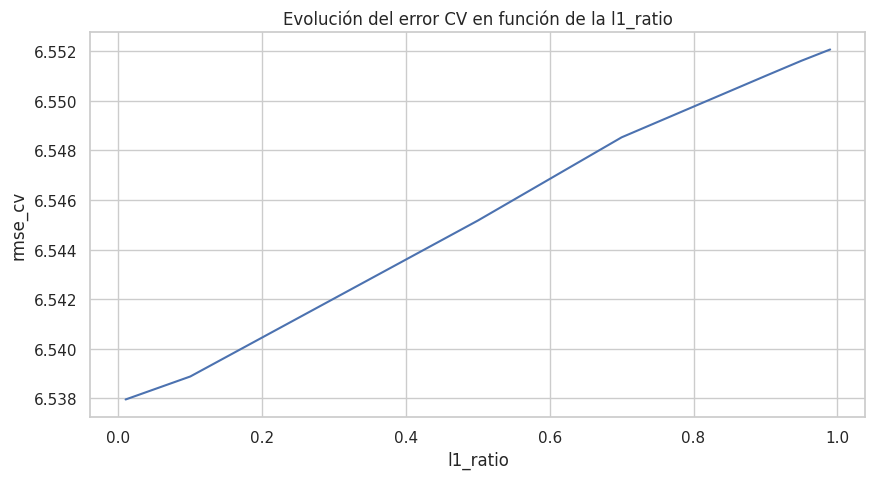

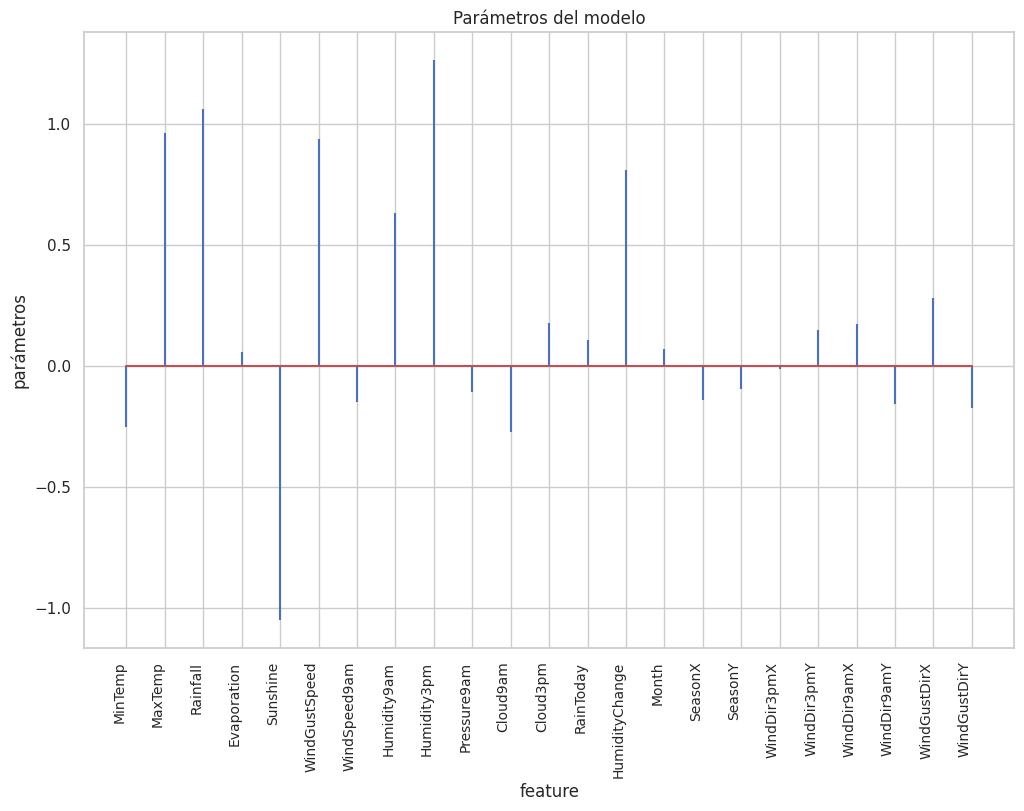

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y.values.reshape(-1,1),test_size=0.2, random_state = 5)
modelo = make_pipeline(StandardScaler(),
                        ElasticNetCV(
                              l1_ratio        = [0.01, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99],
                              alphas          = np.logspace(-1, 1, 100),
                              cv              = 10
                           )
         )

_ = modelo.fit(X_train, y_train)

mod = modelo.steps[1][1]
# Error medio de las 10 particiones por cada valor de alpha y l1_ratio
mean_error_cv = mod.mse_path_.mean(axis =2)

# El resultado es un array de dimensiones (n_l1_ratio, n_alpha) se convierte en un dataframe
df_resultados_cv = pd.DataFrame(
                        data   = mean_error_cv.flatten(),
                        index  = pd.MultiIndex.from_product(
                                    iterables = [mod.l1_ratio, mod.alphas_],
                                    names     = ['l1_ratio', 'mod.alphas_']
                                 ),
                        columns = ["mse_cv"]
                    )

df_resultados_cv['rmse_cv'] = np.sqrt(df_resultados_cv['mse_cv'])
df_resultados_cv = df_resultados_cv.reset_index().sort_values('mse_cv', ascending = True)
df_resultados_cv

fig, ax = plt.subplots(figsize=(10, 5))
df_resultados_cv.groupby('l1_ratio')['rmse_cv'].min().plot(ax = ax)
ax.set_title('Evolución del error CV en función de la l1_ratio')
ax.set_xlabel('l1_ratio')
ax.set_ylabel('rmse_cv')

# Mejor valor alpha y l1_ratio_ encontrado

print(f"Mejor valor de alpha encontrado: {mod.alpha_}")
print(f"Mejor valor de l1_ratio encontrado: {mod.l1_ratio_}")

# Parámetros del modelo
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': mod.coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(12, 8))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('feature')
ax.set_ylabel('parámetros')
ax.set_title('Parámetros del modelo')

# Predicciones test
y_pred = modelo.predict(X_test)

rmse_ols_ENet = mean_squared_error(y_test, y_pred, squared = False)
print(f"El error rmse de test es: {rmse_ols_ENet.round(4)}")

R2_ENet = metrics.r2_score(y_test, y_pred)
print("El R2 es: ", R2_ENet.round(4))

mae_ENet = mean_absolute_error(y_test, y_pred)
print("El error mae de test es: ", mae_ENet.round(4))

Se observa que a mayor componente de Lasso (l1_ratio), mayor es el error, aunque la diferencia es ínfima

## Gradiente descendiente

### Definimos las funciones

In [38]:
### Funciónes obtenidas del curso Aprendizaje Automático 1, TUIA, UNR 2023

def gradient_descent(X_train, y_train, X_test, y_test, lr=0.01, epochs=100):
    """
    shapes:
        X_train = nxm
        y_train = nx1
        X_test = pxm
        y_test = px1
        W = mx1
    """
    n = X_train.shape[0]
    m = X_train.shape[1]

    o = X_test.shape[0]

    # Poner columna de unos a las matrices X
    X_train = np.hstack((np.ones((n, 1)), X_train))
    X_test = np.hstack((np.ones((o, 1)), X_test))


    # Inicializar pesos aleatorios
    W = np.random.randn(m+1).reshape(m+1, 1)

    train_errors = []  # Para almacenar el error de entrenamiento en cada época
    test_errors = []   # Para almacenar el error de prueba en cada época

    for i in range(epochs):
        # Calcular predicción y error de entrenamiento
        prediction_train = np.matmul(X_train, W)
        error_train = y_train - prediction_train
        #print(error_train)
        train_mse = np.mean(error_train ** 2)
        train_errors.append(train_mse)

        # Calcular predicción y error de prueba
        prediction_test = np.matmul(X_test, W)
        error_test = y_test - prediction_test
        test_mse = np.mean(error_test ** 2)
        test_errors.append(test_mse)

        # Calcular el gradiente y actualizar pesos
        grad_sum = np.sum(error_train * X_train, axis=0)
        grad_mul = -2/n * grad_sum  # 1xm
        gradient = np.transpose(grad_mul).reshape(-1, 1)  # mx1

        W = W - (lr * gradient)

    # Graficar errores de entrenamiento y prueba
    # Definir una figura
    plt.figure(figsize=(12, 6))
    # Plotear errores de entrenamiento
    plt.plot(train_errors, label='Error de entrenamiento')
    # Plotear errores de prueba
    plt.plot(test_errors, label='Error de test')
    # Poner labels en los ejes
    plt.xlabel('Época')
    plt.ylabel('Error cuadrático medio')
    # Activar la leyenda
    plt.legend()
    # Poner titulo
    plt.title('Error de entrenamiento y prueba vs iteraciones (GD)')
    # Terminar y mostrar gráfico
    plt.show()

    return W

def stochastic_gradient_descent(X_train, y_train, X_test, y_test, lr=0.01, epochs=100):

    n = X_train.shape[0]
    m = X_train.shape[1]

    X_train = np.hstack((np.ones((n, 1)), X_train))
    X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

    W = np.random.randn(m + 1).reshape(-1, 1)

    train_errors = []
    test_errors = []

    for i in range(epochs):
        # Permutación aleatoria de los datos
        permutation = np.random.permutation(n)
        X_train = X_train[permutation]
        y_train = y_train[permutation]

        for j in range(n):
            # Obtener una muestra aleatoria de un solo dato para hacer SGD
            x_sample = X_train[j]
            y_sample = y_train[j][0]

            prediction = np.matmul(x_sample, W)
            error = y_sample - prediction
            train_mse = error ** 2
            train_errors.append(train_mse)

            gradient = -2 * error * x_sample.T.reshape(-1, 1)

            W = W - (lr * gradient)

            prediction_test = np.matmul(X_test, W)
            error_test = y_test - prediction_test
            test_mse = np.mean(error_test ** 2)
            test_errors.append(test_mse)

    plt.figure(figsize=(12, 6))
    plt.plot(train_errors, label='Error de entrenamiento')
    plt.plot(test_errors, label='Error de prueba')
    plt.xlabel('Iteración')
    plt.ylabel('Error cuadrático medio')
    plt.legend()
    plt.title('Error de entrenamiento y prueba vs iteraciones (SGD)')
    plt.show()

    return W

def mini_batch_gradient_descent(X_train, y_train, X_test, y_test, lr=0.01, epochs=100, batch_size=11):
    n = X_train.shape[0]
    m = X_train.shape[1]

    X_train = np.hstack((np.ones((n, 1)), X_train))
    X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

    W = np.random.randn(m + 1).reshape(-1, 1)

    train_errors = []
    test_errors = []

    for i in range(epochs):

        # Permutación aleatoria de los datos
        permutation = np.random.permutation(n)
        X_train = X_train[permutation]
        y_train = y_train[permutation]


        for j in range(0, n, batch_size):
            # Obtener un lote (mini-batch) de datos
            x_batch = X_train[j:j+batch_size, :]
            y_batch = y_train[j:j+batch_size].reshape(-1, 1)

            prediction = np.matmul(x_batch, W)
            error = y_batch - prediction
            train_mse = np.mean(error ** 2)
            train_errors.append(train_mse)

            gradient = -2 * np.matmul(x_batch.T, error) / batch_size

            W = W - (lr * gradient)

            prediction_test = np.matmul(X_test, W)
            error_test = y_test - prediction_test
            test_mse = np.mean(error_test ** 2)
            test_errors.append(test_mse)

    plt.figure(figsize=(12, 6))
    plt.plot(train_errors, label='Error de entrenamiento')
    plt.plot(test_errors, label='Error de prueba')
    plt.xlabel('Iteración')
    plt.ylabel('Error cuadrático medio')
    plt.legend()
    plt.title('Error de entrenamiento y prueba vs iteraciones (Mini-Batch GD)')
    plt.show()

    return W

### Gradiente Descendiente

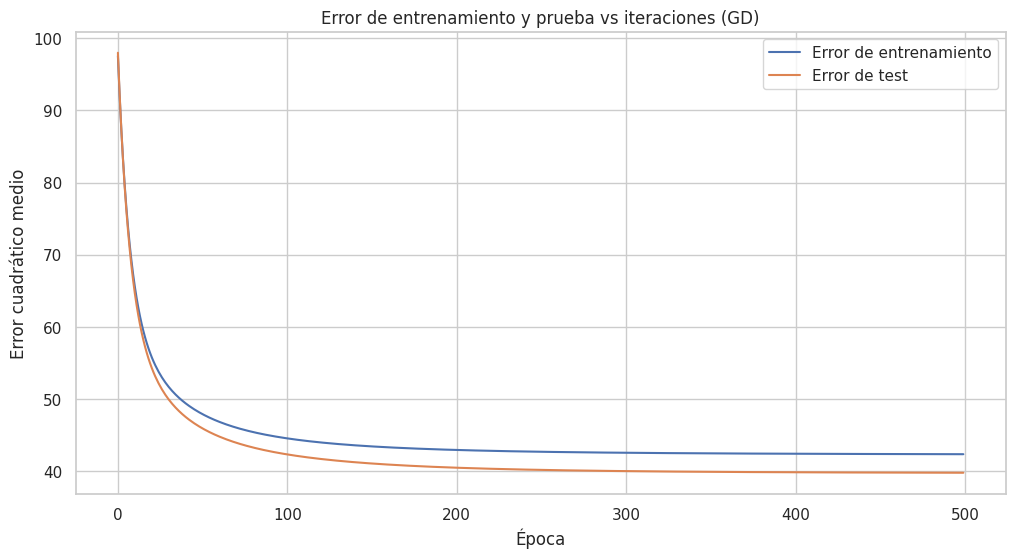

El error rmse de test es: 6.3081
El R2 es:  0.2514
El error mae de test es:  3.1387


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y.values.reshape(-1,1),test_size=0.2, random_state = 5)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

W = gradient_descent(X_train, y_train, X_test, y_test, lr=0.01, epochs=500)
y_pred = np.matmul(np.hstack((np.ones((X_test.shape[0], 1)), X_test)), W)
rmse_ols_GradDescendiente = mean_squared_error(y_test, y_pred, squared = False)
print(f"El error rmse de test es: {rmse_ols_GradDescendiente.round(4)}")

R2_GradDescendiente = metrics.r2_score(y_test, y_pred)
print("El R2 es: ", R2_GradDescendiente.round(4))

mae_GradDescendiente = mean_absolute_error(y_test, y_pred)
print("El error mae de test es: ", mae_GradDescendiente.round(4))

### Gradiente Descendiente Estocástico

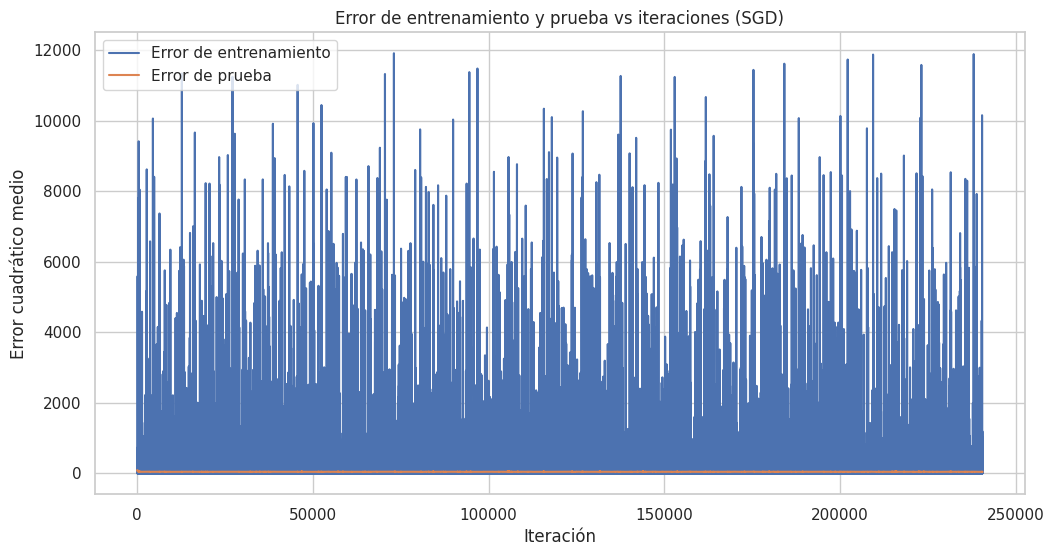

El error rmse de test es: 6.3539
El R2 es:  0.2405
El error mae de test es:  3.4814


In [40]:
W = stochastic_gradient_descent(X_train, y_train, X_test, y_test, lr=0.001, epochs=20)
y_pred = np.matmul(np.hstack((np.ones((X_test.shape[0], 1)), X_test)), W)
rmse_ols_gradEstocastico = mean_squared_error(y_test, y_pred, squared = False)
print(f"El error rmse de test es: {rmse_ols_gradEstocastico.round(4)}")

R2_gradEstocastico = metrics.r2_score(y_test, y_pred)
print("El R2 es: ", R2_gradEstocastico.round(4))

mae_gradEstocastico = mean_absolute_error(y_test, y_pred)
print("El error mae de test es: ", mae_gradEstocastico.round(4))

### Gradiente Descendiente con Mini-Batches

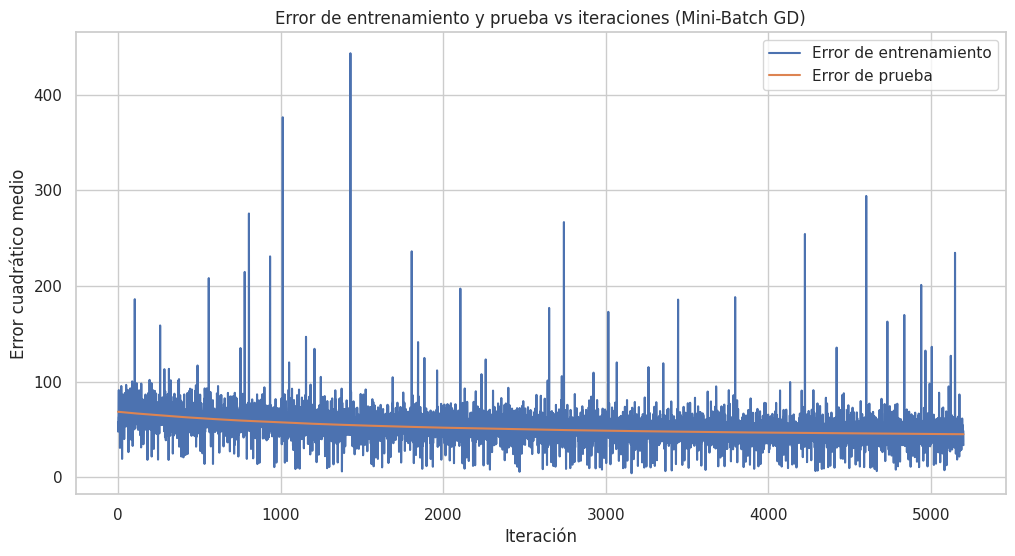

El error rmse de test es: 6.7035
El R2 es:  0.1546
El error mae de test es:  3.5001


In [41]:
W = mini_batch_gradient_descent(X_train, y_train, X_test, y_test, lr=0.0001, epochs=400, batch_size = 1000)
y_pred = np.matmul(np.hstack((np.ones((X_test.shape[0], 1)), X_test)), W)
rmse_ols_gradMiniBatch = mean_squared_error(y_test, y_pred, squared = False)
print(f"El error rmse de test es: {rmse_ols_gradMiniBatch.round(4)}")

R2_gradMiniBatch = metrics.r2_score(y_test, y_pred)
print("El R2 es: ", R2_gradMiniBatch.round(4))

mae_gradMiniBatch = mean_absolute_error(y_test, y_pred)
print("El error mae de test es: ", mae_gradMiniBatch.round(4))

## Resultados

In [42]:
data = {'Modelo': ['Linear Regression', 'Ridge', 'Lasso', 'Elastic Net', 'GD', 'SGD', 'GD Mini-Batch'],
        'Rmse': [rmse_ols_LinearReg, rmse_ols_Ridge, rmse_ols_Lasso, rmse_ols_ENet, rmse_ols_GradDescendiente, rmse_ols_gradEstocastico, rmse_ols_gradMiniBatch],
        'R2': [R2_LinearReg, R2_Ridge, R2_Lasso, R2_ENet, R2_GradDescendiente, R2_gradEstocastico, R2_gradMiniBatch],
        'Mae': [mae_LinearReg, mae_Ridge, mae_Lasso, mae_ENet, mae_GradDescendiente, mae_gradEstocastico, mae_gradMiniBatch],
        }

data = pd.DataFrame(data)
data.round(4)

,Modelo,Rmse,R2,Mae
0,Linear Regression,6.2798,0.2581,3.1605
1,Ridge,6.2803,0.2580,3.1542
2,Lasso,6.3218,0.2481,3.0982
3,Elastic Net,6.3051,0.2521,3.0893
4,GD,6.3081,0.2514,3.1387
5,SGD,6.3539,0.2405,3.4814
6,GD Mini-Batch,6.7035,0.1546,3.5001


Observamos que el mejor resultado para cada tipo de error ocurre en:
- Rmse: Linear Regression
- R2: Linear Regression
- Mae: Gradiente Descendiente Estocástico

Ahora bien, dado que el modelo Ridge nos da un R2 y Rmse muy similar a la Regresión Lineal, decidimos tomarlo como modelo base, ya que debido a la regularización, lo consideramos más robusto en términos de varianza.

# Logistic Regression

Importamos los paquetes necesarios.

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Función para obtener métricas de cada modelo, con distintas samples
def metricas(X_train, y_train, X_test, y_test, niters, class_weight = None):
  accuracies = []
  # Definimos para cada clase
  precisions0 = []
  precisions1 = []
  recalls0 = []
  recalls1 = []
  f1_scores0 = []
  f1_scores1 = []
  for randState in range(niters):
    if class_weight == None:
      logistic_model = LogisticRegression(random_state=randState)
    else:
      logistic_model = LogisticRegression(random_state=randState, class_weight=class_weight)
    logistic_model.fit(X_train, y_train)
    y_pred = logistic_model.predict(X_test)
    # Obtenemos las metricas relevantes
    cm = confusion_matrix(y_test, y_pred)

    accuracies.append((cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]))

    precision0 = (cm[0][0])/(cm[0][0]+cm[0][1])
    precisions0.append(precision0)

    precision1 = (cm[1][1])/(cm[1][1]+cm[1][0])
    precisions1.append(precision1)

    recall0 = cm[0][0]/(cm[0][0]+cm[1][0])
    recalls0.append(recall0)

    recall1 = cm[1][1]/(cm[1][1]+cm[0][1])
    recalls1.append(recall1)

    f1_score0 = (2 * recall0 * precision0)/(recall0 + precision0)
    f1_scores0.append(f1_score0)

    f1_score1 = (2 * recall1 * precision1)/(recall1 + precision1)
    f1_scores1.append(f1_score1)
  # Nos quedamos con los promedios de cada métrica
  avg_accs = np.mean(accuracies)
  avg_p0 = np.mean(precisions0)
  avg_p1 = np.mean(precisions1)
  avg_r0 = np.mean(recalls0)
  avg_r1 = np.mean(recalls1)
  avg_f10 = np.mean(f1_scores0)
  avg_f11 = np.mean(f1_scores1)
  return avg_accs, avg_p0, avg_p1, avg_r0, avg_r1, avg_f10, avg_f11

Cabe aclarar que nuestra matriz de confusión, por cómo están definidas las clases, se ve de la siguiente manera:

\begin{bmatrix}
VN & FN \\
FP & VP
\end{bmatrix}


## Modelo Base

Creamos un modelo base que sólo utilice la variable Rainfall para inferir el valor de RainTomorrow.

In [ ]:
X_soloRainToday = df["Rainfall"].values.reshape(-1,1)
y = df['RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(X_soloRainToday,y.values.reshape(-1,1),test_size=0.2, random_state=5)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

mets = metricas(X_train, y_train.ravel(), X_test, y_test.ravel(), 10)

print("Accuracy: ", mets[0].round(3), "\nPrecision 0: ", mets[1].round(3), "\nPrecision 1: ", mets[2].round(3), "\nRecall 0: ", mets[3].round(3), "\nRecall 1: ", mets[4].round(3), "\nF1 scores 0: ", mets[5].round(3), "\nF1 scores 1: ", mets[6].round(3))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[2263   28]
 [ 652   65]]
Accuracy:  0.774 
Precision 0:  0.988 
Precision 1:  0.091 
Recall 0:  0.776 
Recall 1:  0.699 
F1 scores 0:  0.869 
F1 scores 1:  0.16


Podemos observar que este modelo tiene una precisión muy baja cuando intenta inferir que mañana lloverá, de hecho, menos de 1 de cada 10 veces acertará en esta predicción.
Queda claro que este modelo no es de mucha utilidad, por lo que procedemos a realizar modelos más complejos que tengan las demás variables en cuenta, con la esperanza de mejorar estos resultados.

##Logistic Regression

In [ ]:
X = df[variables_prediccion]
y = df['RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(X,y.values.reshape(-1,1),test_size=0.2, random_state=5)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

metricas_noB = metricas(X_train, y_train.ravel(), X_test, y_test.ravel(), 10)

comp_metricas = pd.DataFrame({'Modelo': ['Logistic Regression Sin Balanceo'],
        'Accuracy': [metricas_noB[0]],
        'Precision_0': [metricas_noB[1]],
        'Precision_1': [metricas_noB[2]],
        'Recall_0': [metricas_noB[3]],
        'Recall_1': [metricas_noB[4]],
        'F1-Score_0': [metricas_noB[5]],
        'F1-Score_1': [metricas_noB[6]],
        })


Ahora vemos los resultados haciendo balanceo de los datos:

In [ ]:
metricas_wb = metricas(X_train, y_train.ravel(), X_test, y_test.ravel(), 10, "balanced")

new_row = pd.DataFrame({'Modelo': ['Pesos balanceados'],
        'Accuracy': [metricas_wb[0]],
        'Precision_0': [metricas_wb[1]],
        'Precision_1': [metricas_wb[2]],
        'Recall_0': [metricas_wb[3]],
        'Recall_1': [metricas_wb[4]],
        'F1-Score_0': [metricas_wb[5]],
        'F1-Score_1': [metricas_wb[6]],
        })

comp_metricas = pd.concat([comp_metricas, new_row], ignore_index=True)

## Oversampling y undersampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

X = df[variables_prediccion]
y = df['RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(X,y.values.reshape(-1,1),test_size=0.2, random_state = 5)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### Oversampling

#### Random oversampling

In [ ]:
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

In [ ]:
metricas_os = metricas(X_resampled, y_resampled, X_test, y_test, 10)

new_row = pd.DataFrame({'Modelo': ['RandomOversampling'],
        'Accuracy': [metricas_os[0]],
        'Precision_0': [metricas_os[1]],
        'Precision_1': [metricas_os[2]],
        'Recall_0': [metricas_os[3]],
        'Recall_1': [metricas_os[4]],
        'F1-Score_0': [metricas_os[5]],
        'F1-Score_1': [metricas_os[6]],
        })

comp_metricas = pd.concat([comp_metricas, new_row], ignore_index=True)

#### SMOTE

In [ ]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
metricas_smote = metricas(X_resampled, y_resampled, X_test, y_test, 10)

new_row = pd.DataFrame({'Modelo': ['RandomOversampling'],
        'Accuracy': [metricas_smote[0]],
        'Precision_0': [metricas_smote[1]],
        'Precision_1': [metricas_smote[2]],
        'Recall_0': [metricas_smote[3]],
        'Recall_1': [metricas_smote[4]],
        'F1-Score_0': [metricas_smote[5]],
        'F1-Score_1': [metricas_smote[6]],
        })

comp_metricas = pd.concat([comp_metricas, new_row], ignore_index=True)

### Undersampling

#### Random undersampler

In [ ]:
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

In [ ]:
metricas_us = metricas(X_resampled, y_resampled, X_test, y_test, 10)

new_row = pd.DataFrame({'Modelo': ['RandomUndersampling'],
        'Accuracy': [metricas_us[0]],
        'Precision_0': [metricas_us[1]],
        'Precision_1': [metricas_us[2]],
        'Recall_0': [metricas_us[3]],
        'Recall_1': [metricas_us[4]],
        'F1-Score_0': [metricas_us[5]],
        'F1-Score_1': [metricas_us[6]],
        })

comp_metricas = pd.concat([comp_metricas, new_row], ignore_index=True)

#### NearMiss

In [ ]:
undersampler = NearMiss(version=1)
X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

In [ ]:
metricas_nm = metricas(X_resampled, y_resampled, X_test, y_test, 10)

new_row = pd.DataFrame({'Modelo': ['NearMiss'],
        'Accuracy': [metricas_nm[0]],
        'Precision_0': [metricas_nm[1]],
        'Precision_1': [metricas_nm[2]],
        'Recall_0': [metricas_nm[3]],
        'Recall_1': [metricas_nm[4]],
        'F1-Score_0': [metricas_nm[5]],
        'F1-Score_1': [metricas_nm[6]],
        })

comp_metricas = pd.concat([comp_metricas, new_row], ignore_index=True)

## Comparación de modelos

In [ ]:
comp_metricas.round(4)

,Modelo,Accuracy,Precision_0,Precision_1,Recall_0,Recall_1,F1-Score_0,F1-Score_1
0,Logistic Regression Sin Balanceo,0.8344,0.9437,0.4854,0.8542,0.7296,0.8967,0.5829
1,Pesos balanceados,0.7726,0.7804,0.7476,0.9081,0.5159,0.8394,0.6105
2,RandomOversampling,0.7753,0.7826,0.7517,0.9097,0.5198,0.8414,0.6146
3,RandomOversampling,0.7753,0.7826,0.7517,0.9097,0.5198,0.8414,0.6146
4,RandomUndersampling,0.7743,0.7826,0.7476,0.9083,0.5184,0.8408,0.6122
5,NearMiss,0.7500,0.7599,0.7183,0.8960,0.4836,0.8224,0.5780


Ya que consideramos como el caso más costoso aquel en el que se predice que no lloverá, pero en realidad termina lloviendo, nos quedamos con el modelo que minimice los falsos negativos. Esto se traduce en que buscamos el modelo que tenga:
*   mayor **precisión** para la clase 0, y/o
*   mayor **recall** para la clase 1 tenga.


En este caso, se trata del modelo que hace un balanceo por medio de **random undersampling**.

In [ ]:
# Nos quedamos con este modelo como base para la clasificación
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)
logistic_model = LogisticRegression(random_state=4)
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


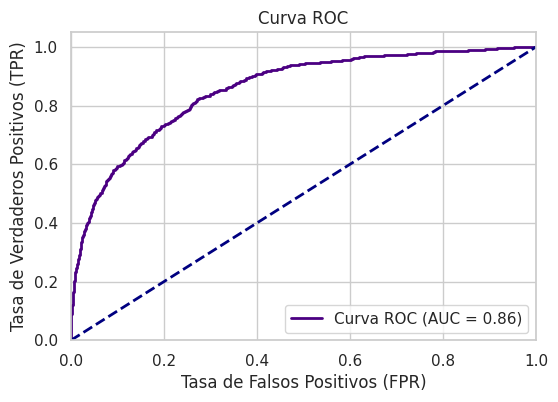

In [ ]:
## Veamos para este modelo su curva ROC-AUC
from sklearn.metrics import roc_curve, roc_auc_score, auc

# Obtengo las probabilidades de predicción del modelo
y_probs = logistic_model.predict_proba(X_test)[:, 1]

# Calculo la ROC y el AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
# Grafico la curva ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='indigo', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

# Redes Neuronales

Ahora, realizaremos modelos que utilicen redes neuronales para la predicción.

In [ ]:
!pip install optuna


In [45]:
import optuna
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical

import warnings
warnings.simplefilter('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.4 MB/s eta 0:00:00


In [61]:
X = df[variables_prediccion]
y = df['RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(X,y.values.reshape(-1,1),test_size=0.2, random_state=5)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
def objective(trial):

    num_layers = trial.suggest_int('num_layers', 1, 4)
    model = Sequential()

    for i in range(num_layers):
        num_units = trial.suggest_int(f'n_units_layer_{i}', 28, 128) # la cantidad de neuronas de cada capa tambien se puede pasar como hiperparámetro
        model.add(Dense(num_units, activation='sigmoid')) # capas densas con activacion ReLU

    # capa de salida
    model.add(Dense(1, activation='sigmoid')) # 3 son las clases de salida

    # compilar
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Recall'])

    # entrenar
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=0)

    # evaluar
    score = model.evaluate(X_test, y_test, verbose=0)
    return score[1]

# crear un estudio de Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=5)

# obtener los mejores hiperparámetros
best_params = study.best_params
print("Best parámetros encontrados:", best_params)

[I 2023-11-21 02:40:06,197] A new study created in memory with name: no-name-96fda276-d3ca-41ad-b0f4-40093aaf65e6


Para la regresión logística, el rendimiento resultó pobre, al menos con tan pocos epochs, para próximas entregas probaremos con una mayor cantidad de epochs y batch size.

In [43]:
X = df[variables_prediccion]
y = df['RainfallTomorrow']
X_train, X_test, y_train, y_test = train_test_split(X,y.values.reshape(-1,1),test_size=0.2, random_state=5)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [56]:
def objective(trial):

    num_layers = trial.suggest_int('num_layers', 1, 5)
    model = Sequential()

    for i in range(num_layers):
        num_units = trial.suggest_int(f'n_units_layer_{i}', 28, 128) # la cantidad de neuronas de cada capa tambien se puede pasar como hiperparámetro
        # activations = trial.suggest_categorical(f'')
        model.add(Dense(num_units, activation='sigmoid')) # capas densas con activacion ReLU

    # capa de salida
    model.add(Dense(1, activation='sigmoid')) # 3 son las clases de salida

    # compilar
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['R2'])

    # entrenar
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=0)

    # evaluar
    score = model.evaluate(X_test, y_test, verbose=0)
    return score[1]

# crear un estudio de Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=5)

# obtener los mejores hiperparámetros
best_params = study.best_params
print("Best parámetros encontrados:", best_params)

[I 2023-11-21 02:25:42,913] A new study created in memory with name: no-name-ae8c32f3-19eb-4197-b926-8fbe9ed9e419
[I 2023-11-21 02:27:06,336] Trial 0 finished with value: 54.72734832763672 and parameters: {'num_layers': 3, 'n_units_layer_0': 79, 'n_units_layer_1': 66, 'n_units_layer_2': 117}. Best is trial 0 with value: 54.72734832763672.
[I 2023-11-21 02:28:29,744] Trial 1 finished with value: 54.9720344543457 and parameters: {'num_layers': 5, 'n_units_layer_0': 113, 'n_units_layer_1': 65, 'n_units_layer_2': 123, 'n_units_layer_3': 112, 'n_units_layer_4': 96}. Best is trial 1 with value: 54.9720344543457.
[I 2023-11-21 02:29:25,138] Trial 2 finished with value: 54.76776885986328 and parameters: {'num_layers': 4, 'n_units_layer_0': 63, 'n_units_layer_1': 107, 'n_units_layer_2': 38, 'n_units_layer_3': 109}. Best is trial 1 with value: 54.9720344543457.
[I 2023-11-21 02:30:48,557] Trial 3 finished with value: 54.9720344543457 and parameters: {'num_layers': 5, 'n_units_layer_0': 99, 'n_un

Best parámetros encontrados: {'num_layers': 5, 'n_units_layer_0': 113, 'n_units_layer_1': 65, 'n_units_layer_2': 123, 'n_units_layer_3': 112, 'n_units_layer_4': 96}


Para la regresión lineal, no parece mejorar el rendimiento, al menos con tan poco entrenamiento, para próximas entregas probaremos con una gran cantidad de epochs.